In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from matplotlib.ticker import LogLocator

# sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

colors = sns.color_palette("tab10")

In [2]:
N_occ = 1
ls = [10, 50, 100, 200]

# FLOPS enhanced JD
FLOPS_beta25_impl1 = np.array([71381572176, 267402005934, 450561598598, 1114613230262])
# baseline FLOPS for beta=8
FLOPS_8_BD = np.array([78181993860, 295787013900, 37581874054200, 217184624648000]) 
# Exact diagonalization FLOPS
Exact_diago = 20*(11994)**3

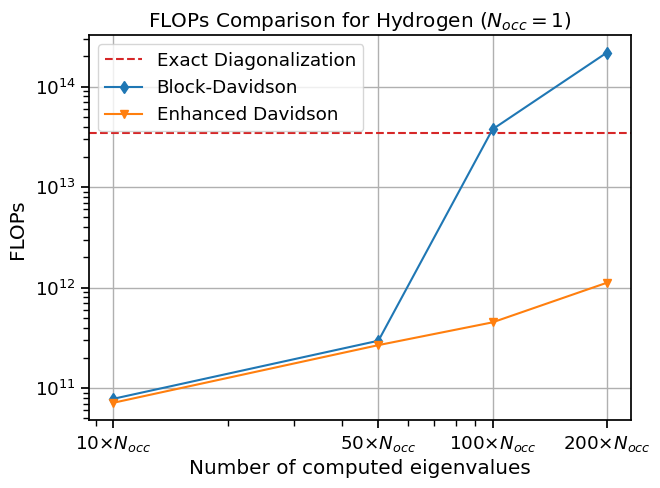

In [3]:
plt.figure(figsize=(7,5))
plt.axhline(y=Exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(ls, FLOPS_8_BD, marker='d', label='Block-Davidson', color=colors[0])
plt.plot(ls, FLOPS_beta25_impl1, marker='v', label='Enhanced Davidson', color=colors[1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPs ')
xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPs Comparison for Hydrogen (${N_{occ}} = 1$)')
plt.legend()
plt.grid(True)
# sns.despine()
# plt.tight_layout()
plt.savefig('FLOPS_comparison_Hydrogen.pdf')
plt.show()

In [4]:
exact_diago = 20*(27643)**3
N_occ = 6

N_block = np.array([10, 15, 17, 19, 21, 23]) * N_occ
N_defl = np.array([10, 50, 100, 200]) * N_occ

# standard (diagonal preconditioner) block davidson 
FLOPS_8 = np.array([2518161716700, 4963508588430, 5649837038706, 8023362857502, 10291034586294, 2670818405106120], dtype=np.int64)


FLOPS_new = np.array([2326417155314, 16242097824685, 22348217655421, 33487479213871])

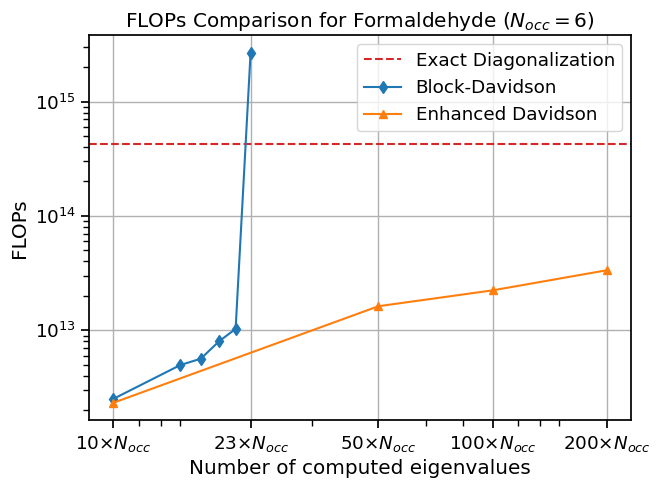

In [5]:
plt.figure(figsize=(7, 5))
plt.axhline(y=exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(N_block, FLOPS_8, marker='d', label='Block-Davidson', color=colors[0])
plt.plot(N_defl, FLOPS_new, marker='^', label='Enhanced Davidson', color=colors[1])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPs')

xticks = np.array([10, 23, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 23, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPs Comparison for Formaldehyde (${N_{occ}} = 6$)')
plt.legend()
plt.grid(True)
# sns.despine()
plt.savefig('FLOPS_comparison_Formaldehyde.pdf')
plt.show()

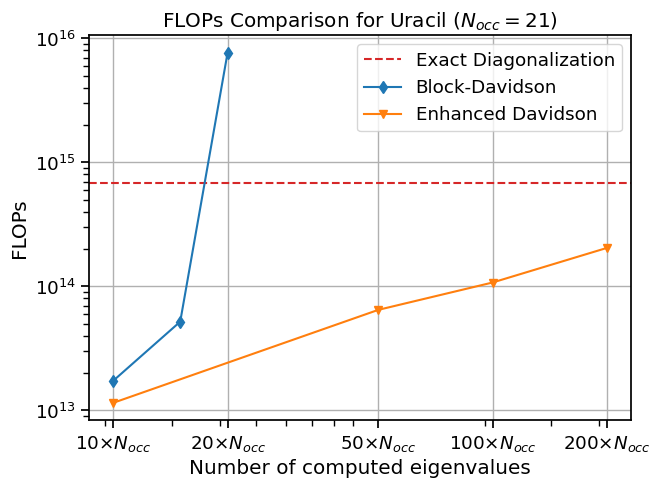

In [6]:
N_occ = 21
N_virt = 32416

N_block = np.array([10, 15, 20]) * N_occ
N = np.array([10, 50, 100, 200]) * N_occ


exact_diago = 20*(N_virt)**3

# standard (diagonal preconditioner) davidson
FLOPS_8 = np.array([17409559198080, 51966583944660, 7668475640448000])
FLOPS_new = np.array([11525840714320, 64742985385200, 107502332028348, 204135073174668])

plt.figure(figsize=(7, 5))
plt.axhline(y=exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(N_block, FLOPS_8, marker='d', label='Block-Davidson', color=colors[0])
plt.plot(N, FLOPS_new, marker='v', label='Enhanced Davidson', color=colors[1])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPs')

xticks = np.array([10, 20, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 20, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPs Comparison for Uracil (${N_{occ}} = 21$)')
plt.legend()
plt.grid(True)
# sns.despine()
plt.savefig('FLOPS_comparison_Uracile.pdf')
plt.show()
